<h1>Multivariate Gaussian</h1>

Multivariate Gaussian or multivariate normal is a generalisation of 1-d univariate Gaussian to higher dimensions. A random vector is said to be k-variate normally distributed if every linear combination of its k components has a univariate Gaussian distribution [1]. Multivariate Gaussian is used to describe any set of correlated of real-values random variabled. In that case, we often specify a multivariate Gaussian using a mean vector $\mu$ and a coveriance matrix K. Since we can always centralized mean to zero, in this sense, the correlation of any set of the random variables can be fully specified by the corvariance matrix K:

$$
            x \sim N_k (0, K) ~~\text{where}~~\text{K is the}~k \times k~\text{coveriance matrix}
$$


Let's create a 2-variate Gaussian distribution. We create serveral different K, which allows us to observe how correlation score regularise the look of multivariate Gaussian.

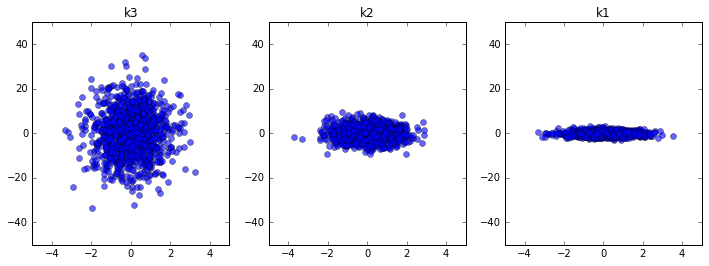

In [24]:
%matplotlib inline
import numpy as np
import scipy.stats as sps
from pylab import *

mu = [0, 0]
k1 = [[1, 0], 
     [0, 1]]
k2 = [[1, 0], 
     [0, 10]]
k3 = [[1, 0], 
     [0, 100]]

ks = {
    'k1':k1, 
    'k2':k2,
    'k3':k3
}

figure(figsize=(12, 4))
i = 0

mvs = []
for name, k in ks.iteritems():
    # sampling 1000 pairs of 2-variate Gaussian variables
    x1, x2 = np.random.multivariate_normal(mu, k, 1000).T
    mvs.append({'x1': x1, 'x2': x2})
    
    subplot(131 + i)
    plot(x1, x2, 'o', alpha=0.6)
    xlim(-5, 5)
    ylim(-50, 50)
    title(name)
    i += 1

show()

The difference can be observed: with k=k1, the distribution plot looks flatter.

Now we can perform KDE estimation for our 2-variate Gaussians with Gaussian kernel. Since we use Scipy, Scott's rule is applied be default for bandwidth selection for our KDE estimation. In Scott's rule, the bandwidth is calculated as: $n^{(-1. / (d+4))}$, where n is the number of data points and d is the dimension of the data. In our case, n=1000, d=2. Thus bandwidth for KDE is about 0.316.

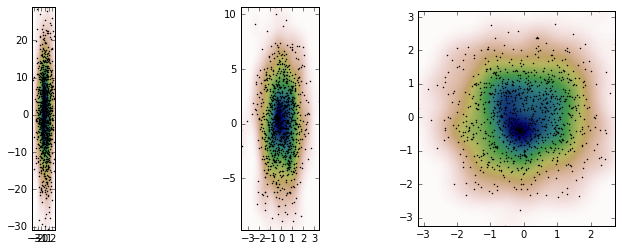

In [22]:
figure(figsize=(12, 4))
i = 0

for mv in mvs:
    x1 = mv['x1']
    x2 = mv['x2']
    x1_min = np.min(x1)
    x1_max = np.max(x1)
    x2_min = np.min(x2)
    x2_max = np.max(x2)
    
    # resampling some x1 and x2
    # [x1_min:x1_max:100j] is same as np.linspace(x1_min, x1_max, step=100, endpoint=1)
    _x1, _x2 = np.mgrid[x1_min:x1_max:100j, x2_min:x2_max:100j]
    positions = np.vstack([_x1.ravel(), _x2.ravel()])
    values = np.vstack([x1, x2])
    kernel = sps.gaussian_kde(values)
    Z = np.reshape(kernel.evaluate(positions).T, _x1.shape)
    
    subplot(131 + i)
    imshow(np.rot90(Z), cmap=cm.gist_earth_r, extent=[x1_min, x1_max, x2_min, x2_max])
    plot(x1, x2, 'k.', markersize=2)
    xlim([x1_min, x1_max])
    ylim([x2_min, x2_max])
    title('k' + str(i+1))
    
    i += 1

show()